___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.carrerasenlinea.mx/logos/original/logo-instituto-tecnologico-y-de-estudios-superiores-de-occidente.png" width="150px" height="100px" />



# <font color= salmon > Laboratorio 4 - Analisis Fundamental</font>




### Integrantes: 
- <Strong> Chavez Jacobo Diana Teresa </Strong> 


- <Strong> Calderón Erape Jazmín </Strong>

#### 14 Abril 2019

___
### <Strong> <font color = skyblue> I. Motivación del Laboratorio </Strong>

___
### <Strong> <font color = skyblue> II. Objetivos específicos </Strong>

In [1]:
# -- ------------------ Importar modulos a utilizar ------------------ -- #

import pandas as pd
from oandapyV20 import API
import oandapyV20.endpoints.instruments as instruments
#import plotly.graph_objs as go
#import plotly as py
from datetime import datetime, date, time, timedelta
import calendar
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [2]:
# -- ------------------ Parámetros para Data Frame ------------------ -- #

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

In [3]:
# -- ------------------ Parámetros para OANDA ------------------ -- #

A1_OA_Da = 16                     # Day Align
A1_OA_Ta = "America/Mexico_City"  # Time Align

A1_OA_Ai = "101-004-2221697-001"  # Id de cuenta
A1_OA_At = "practice"             # Tipo de cuenta

A1_OA_In = "USD_MXN"              # Instrumento
A1_OA_Gn = "M5"                   # Granularidad de velas

A1_OA_Ak =  "6ff" + "6703d22fd972709992df543492afe" + "-f954a9914f9b39f72fba177a23eb243" + "b" #mi api


In [4]:
# -- ------------------ Estructuras de datos ------------------ -- #

# -- Paso 1 -- Data Frame (df1_precios) descargando todos los precios, segun fechas y granularidad
# -- -- Fecha, Apertura, Maximo, Minimo, Cierre.

# -- Paso 2 -- en Data Frame (df2_operaciones)
# -- -- Fecha, Folio (1 a n), Operacion (1 = compra, -1 = venta), Unidades (0 a n),
# -- -- Margen (0 a n), Comentario ("razon con base al indicador")
# -- -- Precio_apertura, Precio_cierre

# -- Paso 3 -- en Data Frame Cuenta (df3_cuenta)
# -- -- Fecha, Capital (Efectivo $), Flotante ($),
# -- -- Balance (Capital+Flotante), Rend_Balance_acm, Comentario ("Se abrio operacion: compra/venta",
# -- -- "Se cerro operacion: Con perdia de: / Con ganancia de: ", 

# -- Paso 4 -- Generar un vector de fechas, de F1 hasta F2

par0_cap = 100000   # Capital a utilizar $100,000 Usd
par1_mar = 1000000  # Unidades por operacion maximo 1'000,000


# -- Criterios para trading
# -- para cerrar una operacion: 1) TP o SL, 2) Regla con indicador

indice = [1, 2, 3, 4, 5]
columnas = ['A','B', 'C', 'D']
df = pd.DataFrame(index=indice, columns=columnas)
df = df.fillna(0) # -- llenar todas las celdas con 0s

In [5]:
# -- ------------------ Inicializar API de OANDA ------------------ -- #

api = API(access_token=A1_OA_Ak)

In [6]:
# -- ------------------ Función de fechas para descargar precios ------------------ -- #

from datetime import date, datetime, timedelta
from dateutil.relativedelta import relativedelta

def date_range(start_date, end_date, increment, period):
    result = []
    nxt = start_date
    delta = relativedelta(**{period:increment})
    while nxt <= end_date:
        result.append(nxt)
        nxt += delta
    return result

In [7]:
# -- ------------------ Vector de fechas por periodos de 15 días ------------------ -- #

start_date = date(2017, 4, 14)
end_date = date(2019, 4, 10)
fechas = date_range(start_date, end_date, 15, 'days')

F1 = fechas[0].strftime('%Y-%m-%dT%H:%M:%S')
F2 = fechas[1].strftime('%Y-%m-%dT%H:%M:%S')

___
### <Strong> <font color = skyblue> DataFrame1 Precios peso-dólar </Strong>

In [8]:
# -- ------------------ Descarga de los precios de OANDA ------------------ -- #


params = {"granularity": A1_OA_Gn, "price": "M", "dailyAlignment": A1_OA_Da,
          "alignmentTimezone": A1_OA_Ta, "from": F1, "to": F2}

A1_Req1 = instruments.InstrumentsCandles(instrument=A1_OA_In, params=params)
A1_Hist = api.request(A1_Req1)

In [9]:
# -- ------------------ Muestra de descarga de los precios de OANDA ------------------ -- #

lis = []
for i in range(len(A1_Hist['candles'])-1):
        lis.append({'TimeStamp': A1_Hist['candles'][i]['time'],
                      'Open': A1_Hist['candles'][i]['mid']['o'],
                      'High': A1_Hist['candles'][i]['mid']['h'],
                      'Low': A1_Hist['candles'][i]['mid']['l'],
                      'Close': A1_Hist['candles'][i]['mid']['c']})

#Precios históricos del peso dólar

pd_hist = pd.DataFrame(lis)
pd_hist = pd_hist[['TimeStamp', 'Open', 'High', 'Low', 'Close']]
pd_hist['TimeStamp'] = pd.to_datetime(pd_hist['TimeStamp'])
pd_hist.set_index('TimeStamp')

,Open,High,Low,Close
TimeStamp,,,,
2017-04-14 04:00:00+00:00,18.57634,18.57638,18.57450,18.57556
2017-04-14 04:05:00+00:00,18.57564,18.57619,18.57479,18.57558
2017-04-14 04:10:00+00:00,18.57560,18.57568,18.57540,18.57547
2017-04-14 04:15:00+00:00,18.57550,18.57550,18.57534,18.57538
2017-04-14 04:20:00+00:00,18.57536,18.57560,18.56932,18.57492
...,...,...,...,...
2017-04-28 20:30:00+00:00,18.82808,18.82991,18.82721,18.82988
2017-04-28 20:35:00+00:00,18.82985,18.83002,18.82970,18.82970
2017-04-28 20:40:00+00:00,18.82972,18.82973,18.82614,18.82672


___
### <Strong> <font color = skyblue> Indicador: Consumer Price Index ex Food & Energy (MoM)</Strong>

In [10]:
# -- ------------------ Importar datos del indicador deseado ------------------ -- #

indicador = pd.read_csv('https://raw.githubusercontent.com/Dianachav/bebe/master/Consumer%20Price%20Index%20ex%20Food%20%26%20Energy%20(MoM).csv')
pd.set_option('display.max_rows', 25)
indicador.set_index('DateTime')

,Actual,Consensus,Previous
DateTime,,,
4/10/19 12:30,0.1,0.2,0.1
3/12/19 12:30,0.1,0.2,0.2
2/13/19 13:30,0.2,0.2,0.2
1/11/19 13:30,0.2,0.2,0.2
12/12/18 13:30,0.2,0.2,0.2
11/14/18 13:30,0.2,0.2,0.1
10/11/18 12:30,0.1,0.2,0.1
9/13/18 12:30,0.1,0.2,0.2
8/10/18 12:30,0.2,0.2,0.2


___
### <Strong> <font color = skyblue> Escenarios del indicador </Strong>

$A$ = $Actual$ ≥ $Consensus$ ≥ $Previous$

$B$ = $Actual$ ≥ $Consensus$ ≤ $Previous$

$C$ = $Actual$ ≤ $Consensus$ ≥ $Previous$

$D$ = $Actual$ ≤ $Consensus$ ≤ $Previous$

Donde:

$Actual$ : Es el valor actual del indicador.

$Consensus$ : Es el valor del indicador que se pronóstica.

$Previous$ : Es el valor anterior del indicador.

In [11]:
# -- ------------------ Definición de escenarios ------------------ -- #

escenarios = []

for i in range(len(indicador['Actual'])):
    if indicador['Actual'][i]>= indicador['Consensus'][i]>=indicador['Previous'][i]: #Escenario A
        escenarios.append('A')
    elif indicador['Actual'][i]>= indicador['Consensus'][i]<=indicador['Previous'][i]:#Escenario B
        escenarios.append('B')
    elif indicador['Actual'][i]<= indicador['Consensus'][i]>=indicador['Previous'][i]: #Escenario C
        escenarios.append('C')
    elif indicador['Actual'][i]<= indicador['Consensus'][i]<=indicador['Previous'][i]: #Escenario D
        escenarios.append('D')

___
### <Strong> <font color = skyblue> DataFrame 4 escenario del indicador por fecha </Strong>

In [12]:
# -- ------------------ Elaboración de DataFrame con datos del indicador y escenario ------------------ -- #

tabla=pd.DataFrame(columns=['DateTime','Actual','Consensus', 'Previous', 'Scene'])
tabla['DateTime'] = indicador['DateTime']
tabla['Actual'] = indicador['Actual']
tabla['Consensus'] = indicador['Consensus']
tabla['Previous'] = indicador['Previous']
tabla['Scene'] = escenarios
pd.set_option('display.max_rows', 25)
tabla.set_index('DateTime')

,Actual,Consensus,Previous,Scene
DateTime,,,,
4/10/19 12:30,0.1,0.2,0.1,C
3/12/19 12:30,0.1,0.2,0.2,C
2/13/19 13:30,0.2,0.2,0.2,A
1/11/19 13:30,0.2,0.2,0.2,A
12/12/18 13:30,0.2,0.2,0.2,A
11/14/18 13:30,0.2,0.2,0.1,A
10/11/18 12:30,0.1,0.2,0.1,C
9/13/18 12:30,0.1,0.2,0.2,C
8/10/18 12:30,0.2,0.2,0.2,A


(array([12.,  0.,  0.,  0.,  0., 11.,  0.,  0.,  0.,  2.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

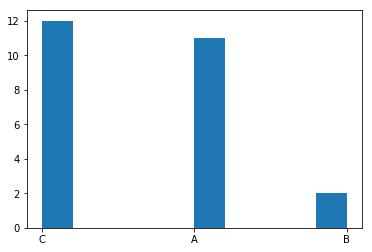

In [13]:
plt.hist(escenarios)

In [14]:
serie = []
for i in range(0,25):
    serie.append(i+1)

___
### <Strong> <font color = skyblue> Ventanas: 10 datos antes del indicador y 10 datos después </Strong>

In [15]:
# -- Función para descargar las ventanas de precios históricos [Open, High, Low, Close] -- #

def ventana(F1,F2):
    params = {"granularity": A1_OA_Gn, "price": "M", "dailyAlignment": A1_OA_Da,
              "alignmentTimezone": A1_OA_Ta, "from": F1, "to": F2}

    A1_Req1 = instruments.InstrumentsCandles(instrument=A1_OA_In, params=params)
    A1_Hist = api.request(A1_Req1)
    lista = []

    for i in range(len(A1_Hist['candles'])-1):
            lista.append({'TimeStamp': A1_Hist['candles'][i]['time'],
                          'Open': A1_Hist['candles'][i]['mid']['o'],
                          'High': A1_Hist['candles'][i]['mid']['h'],
                          'Low': A1_Hist['candles'][i]['mid']['l'],
                          'Close': A1_Hist['candles'][i]['mid']['c'],
                          'Serie': serie[i]})

    pd_hist = pd.DataFrame(lista)
    pd_hist = pd_hist[['TimeStamp', 'Serie', 'Open', 'High', 'Low', 'Close']]
    pd_hist['TimeStamp'] = pd.to_datetime(pd_hist['TimeStamp'])
    #a = pd_hist.set_index('TimeStamp')
    return(pd_hist)

___
### <Strong> <font color = skyblue> Características </Strong>

$C1$ = $High_{max}$ - $Low_{min}$  -> Volatilidad

$C2$ = $Open_{t0}$ - $Close_{t10}$  -> Dirección

$C3$ = $Open_{t0}$ - $Low_{t10}$   -> Draw Down

$C4$ = $Open_{t0}$ - $High_{t10}$   -> Draw Up

Donde:

${max}$ = Máximo valor de la ventana de precios

${min}$ = Mínimo valor de la ventana de precios

$t_{0}$ = Tiempo de ocurrencia del indicador

$t_{10}$ = Último dato de la ventana de precios

In [16]:
# -- ------------------ Definición de las características de los escenarios  ------------------ -- #

def caract(v):
    o = v['Open'].astype(float)
    c = v['Close'].astype(float)
    l = v['Low'].astype(float)
    h = v['High'].astype(float)

    caract1= max(h)-min(l)
    caract2= o[10]-c[20]
    caract3= o[10]-l[20]
    caract4= o[10]-h[20]
    c1=round(caract1,3)
    c2=round(caract2,3)
    c3=round(caract3,3)
    c4=round(caract4,3)
    return(c1,c2,c3,c4)

In [17]:
def c1(v):
    v1_o = v["Open"][10]
    v1_c = v["Close"][10]
    #v["High"].astype(float)
    #v["Low"].astype(float)
    v["Serie"].astype(float)
    h = v.loc[v['High'] == max(v['High'])]
    l = v.loc[v['Low'] == min(v['Low'])]
    hh = float(h['Serie'])
    ll = float(l["Serie"])
    vol = hh - ll
    return(vol)

In [18]:
# -- --------------------------------------Ventana indicador 1 ---------------------------------- #

v = ventana(F1 = "2019-04-10T11:40:00Z",F2 = "2019-04-10T13:30:00Z")
v1=caract(v)
v1_o = v["Open"][10]
v1_c = v["Close"][20]
vol1=c1(v)


In [19]:
# -- --------------------------------------Ventana indicador 2 ---------------------------------- #

v = ventana(F1 = "2019-03-12T11:40:00Z",F2 = "2019-03-12T13:30:00Z")
v2=caract(v)
v2_o = v["Open"][10]
v2_c = v["Close"][20]
vol2=c1(v)


In [20]:
# -- --------------------------------------Ventana indicador 3 ---------------------------------- #

v = ventana(F1 = "2019-02-13T12:40:00Z",F2 = "2019-02-13T14:30:00Z")
v3=caract(v)
v3_o = v["Open"][10]
v3_c = v["Close"][20]
vol3=c1(v)

In [21]:
# -- --------------------------------------Ventana indicador 4 ---------------------------------- #

v = ventana(F1 = "2019-01-11T12:40:00Z",F2 = "2019-01-11T14:30:00Z")
v4=caract(v)
v4_o = v["Open"][10]
v4_c = v["Close"][20]
vol4=c1(v)

In [22]:
# -- --------------------------------------Ventana indicador 5 ---------------------------------- #

v = ventana(F1 = "2018-12-12T12:40:00Z",F2 = "2018-12-12T14:30:00Z")
v5=caract(v)
v5_o = v["Open"][10]
v5_c = v["Close"][20]
vol5=c1(v)

In [23]:
# -- --------------------------------------Ventana indicador 6 ---------------------------------- #

v = ventana(F1 = "2018-11-14T12:40:00Z",F2 = "2018-11-14T14:30:00Z")
v6=caract(v)
v6_o = v["Open"][10]
v6_c = v["Close"][20]
vol6=c1(v)

In [24]:
# -- --------------------------------------Ventana indicador 7 ---------------------------------- #

v = ventana(F1 = "2018-10-11T11:40:00Z",F2 = "2018-10-11T13:30:00Z")
v7=caract(v)
v7_o = v["Open"][10]
v7_c = v["Close"][20]
vol7=c1(v)

In [25]:
# -- --------------------------------------Ventana indicador 8 ---------------------------------- #

v = ventana(F1 = "2018-09-13T11:40:00Z",F2 = "2018-09-13T13:30:00Z")
v8=caract(v)
v8_o = v["Open"][10]
v8_c = v["Close"][10]
vol8=c1(v)

In [26]:
# -- --------------------------------------Ventana indicador 9 ---------------------------------- #

v = ventana(F1 = "2018-08-10T11:40:00Z",F2 = "2018-08-10T13:30:00Z")
v9=caract(v)
v9_o = v["Open"][10]
v9_c = v["Close"][20]
vol9=c1(v)

In [27]:
# -- --------------------------------------Ventana indicador 10 ---------------------------------- #

v = ventana(F1 = "2018-07-12T11:40:00Z",F2 = "2018-07-12T13:30:00Z")
v10=caract(v)
v10_o = v["Open"][10]
v10_c = v["Close"][20]
vol10=c1(v)

In [28]:
# -- --------------------------------------Ventana indicador 11 ---------------------------------- #

v = ventana(F1 = "2018-06-12T11:40:00Z",F2 = "2018-06-12T13:30:00Z")
v11=caract(v)
v11_o = v["Open"][10]
v11_c = v["Close"][20]
vol11=c1(v)

In [29]:
# -- --------------------------------------Ventana indicador 12 ---------------------------------- #

v = ventana(F1 = "2018-05-10T11:40:00Z",F2 = "2018-05-10T13:30:00Z")
v12=caract(v)
v12_o = v["Open"][10]
v12_c = v["Close"][20]
vol12=c1(v)

In [30]:
# -- --------------------------------------Ventana indicador 13 ---------------------------------- #

v = ventana(F1 = "2018-04-11T11:40:00Z",F2 = "2018-04-11T13:30:00Z")
v13=caract(v)
v13_o = v["Open"][10]
v13_c = v["Close"][20]
vol13=c1(v)

In [31]:
# -- --------------------------------------Ventana indicador 14 ---------------------------------- #

v = ventana(F1 = "2018-03-13T11:40:00Z",F2 = "2018-03-13T13:30:00Z")
v14=caract(v)
v14_o = v["Open"][10]
v14_c = v["Close"][20]
vol14=c1(v)

In [32]:
# -- --------------------------------------Ventana indicador 15 ---------------------------------- #

v = ventana(F1 = "2018-02-14T12:40:00Z",F2 = "2018-02-14T14:30:00Z")
v15=caract(v)
v15_o = v["Open"][10]
v15_c = v["Close"][20]
vol15=c1(v)

In [33]:
# -- --------------------------------------Ventana indicador 16 ---------------------------------- #

v = ventana(F1 = "2018-01-12T12:40:00Z",F2 = "2018-01-12T14:30:00Z")
v16=caract(v)
v16_o = v["Open"][10]
v16_c = v["Close"][20]
vol16=c1(v)

In [34]:
# -- --------------------------------------Ventana indicador 17 ---------------------------------- #

v = ventana(F1 = "2017-12-13T12:40:00Z",F2 = "2017-12-13T14:30:00Z")
v17=caract(v)
v17_o = v["Open"][10]
v17_c = v["Close"][20]
vol17=c1(v)

In [35]:
# -- --------------------------------------Ventana indicador 18 ---------------------------------- #

v = ventana(F1 = "2017-11-15T11:40:00Z",F2 = "2017-11-15T13:30:00Z")
v18=caract(v)
v18_o = v["Open"][10]
v18_c = v["Close"][20]
vol18=c1(v)

In [36]:
# -- --------------------------------------Ventana indicador 19 ---------------------------------- #

v = ventana(F1 = "2017-10-13T11:40:00Z",F2 = "2017-10-13T13:30:00Z")
v19=caract(v)
v19_o = v["Open"][10]
v19_c = v["Close"][20]
vol19=c1(v)

In [37]:
# -- --------------------------------------Ventana indicador 20 ---------------------------------- #

v = ventana(F1 = "2017-09-14T11:40:00Z",F2 = "2017-09-14T13:30:00Z")
v20=caract(v)
v20_o = v["Open"][10]
v20_c = v["Close"][10]
vol20=c1(v)

In [38]:
# -- --------------------------------------Ventana indicador 21 ---------------------------------- #

v = ventana(F1 = "2017-08-11T11:40:00Z",F2 = "2017-08-11T13:30:00Z")
v21=caract(v)
v21_o = v["Open"][10]
v21_c = v["Close"][20]
vol21=c1(v)

In [39]:
# -- --------------------------------------Ventana indicador 22 ---------------------------------- #

v = ventana(F1 = "2017-07-14T11:40:00Z",F2 = "2017-07-14T13:30:00Z")
v22=caract(v)
v22_o = v["Open"][10]
v22_c = v["Close"][20]
vol22=c1(v)

In [40]:
# -- --------------------------------------Ventana indicador 23 ---------------------------------- #

v = ventana(F1 = "2017-06-14T11:40:00Z",F2 = "2017-06-14T13:30:00Z")
v23=caract(v)
v23_o = v["Open"][10]
v23_c = v["Close"][20]
vol23=c1(v)

In [41]:
# -- --------------------------------------Ventana indicador 24 ---------------------------------- #

v = ventana(F1 = "2017-05-12T11:40:00Z",F2 = "2017-05-12T13:30:00Z")
v24=caract(v)
v24_o = v["Open"][10]
v24_c = v["Close"][20]
vol24=c1(v)

In [42]:
# -- --------------------------------------Ventana indicador 25 ---------------------------------- #

v = ventana(F1 = "2017-04-14T11:40:00Z",F2 = "2017-04-14T13:30:00Z")
v25=caract(v)
v25_o = v["Open"][10]
v25_c = v["Close"][20]
vol25=c1(v)

___
### <Strong> <font color = skyblue> DataFrame 5 Escenario-Características </Strong>

In [43]:
volatilidad=[vol1,vol2,vol3,vol4,vol5,vol6,vol7,vol8,vol9,vol10,vol11,vol12,vol13,vol14,vol15,
            vol16,vol17,vol18,vol19,vol20,vol21,vol22,vol23,vol24,vol25]

operación=[]
for i in range(len(volatilidad)):
    if volatilidad[i]<0:
        operación.append('Negativa')
    else:
        operación.append('Positiva')
        
        

In [44]:
# -- ------------------ DataFrame de las características por escenario ------------------ -- #

indice = tabla['Scene']
columnas = ['Volatilidad','Dirección', 'Draw Down', 'Draw Up']
df = pd.DataFrame(index=indice, columns=columnas)

df.iloc[0] = v1
df.iloc[1] = v2
df.iloc[2] = v3
df.iloc[3] = v4
df.iloc[4] = v5
df.iloc[5] = v6
df.iloc[6] = v7
df.iloc[7] = v8
df.iloc[8] = v9
df.iloc[9] = v10
df.iloc[10] = v11
df.iloc[11] = v12
df.iloc[12] = v13
df.iloc[13] = v14
df.iloc[14] = v15
df.iloc[15] = v16
df.iloc[16] = v17
df.iloc[17] = v18
df.iloc[18] = v19
df.iloc[19] = v20
df.iloc[20] = v11
df.iloc[21] = v22
df.iloc[22] = v23
df.iloc[23] = v24
df.iloc[24] = v25
df['Tipo de Volatilidad']=operación
df

,Volatilidad,Dirección,Draw Down,Draw Up,Tipo de Volatilidad
Scene,,,,,
C,0.06,0.022,0.025,0.014,Negativa
C,0.141,0.063,0.074,0.062,Negativa
A,0.102,-0.046,-0.044,-0.065,Positiva
A,0.089,-0.037,-0.018,-0.039,Positiva
A,0.119,0.035,0.052,0.034,Negativa
A,0.128,0.037,0.054,0.025,Negativa
C,0.141,0.04,0.042,0.023,Negativa
C,0.151,0.122,0.136,0.117,Negativa
A,0.182,-0.149,-0.107,-0.161,Positiva


### <Strong> <font color = skyblue> DataFrame 2 Operaciones </Strong>

In [45]:
# -- ------------------ Vector de decisiones ------------------ -- #
Decision=[]
for i in range(len(escenarios)):
    if escenarios[i]=='A':
        Decision.append('Venta')
    elif escenarios[i]=='B':
        Decision.append('S/O')
    elif escenarios[i]=='C':
        Decision.append('Venta')
        
   

In [46]:
# -- ------------------ Vector de compra de unidades de divisa ------------------ -- #
Unidades=[]
for i in range(len(escenarios)):
    if escenarios[i]=='A':
        Unidades.append(1000)
    elif escenarios[i]=='B':
        Unidades.append(0)
    elif escenarios[i]=='C':
        Unidades.append(5000)
        
   

In [47]:
# -- Paso 2 -- en Data Frame (df2_operaciones)
# -- -- Fecha, Folio (1 a n), Operacion (1 = compra, -1 = venta), Unidades (0 a n),
# -- -- Margen (0 a n), Comentario ("razon con base al indicador")
# -- -- Precio_apertura, Precio_cierre

In [48]:
# -- ------------------ Creación de Folios para las operaciones ------------------ -- #

folio= []
for i in range(0,25):
    folio.append(1+i)
folio.reverse()

In [49]:
# -- ------------------ Vectores de los Precios de Apertura y Cierre (Open y Close) ------------------ -- #

P_O = [v1_o, v2_o, v3_o, v4_o, v5_o, v6_o, v7_o, v8_o, v9_o, v10_o, v11_o, v12_o, v13_o, v14_o, v15_o, v16_o,
       v17_o, v18_o, v19_o, v20_o, v21_o, v22_o, v23_o, v24_o, v25_o]

P_C = [v1_c, v2_c, v3_c, v4_c, v5_c, v6_c, v7_c, v8_c, v9_c, v10_c, v11_c, v12_c, v13_c, v14_c, v15_c, v16_c,
       v17_c, v18_c, v19_c, v20_c, v21_c, v22_c, v23_c, v24_c, v25_c]

In [50]:
# -- ------------------ Comentarios de las operaciones ------------------ -- #

C = ["Indicador de Dirección bajista",
    "Indicador de Dirección bajista",
    "Indicador de Dirección posible bajista",
    "Indicador de Dirección posible bajista",
    "Indicador de Dirección posible bajista",
    "Indicador de Dirección posible bajista",
    "Indicador de Dirección bajista",
    "Indicador de Dirección bajista",
    "Indicador de Dirección posible bajista",
    "Indicador de Dirección posible bajista",
    "Indicador de Dirección posible bajista",
    "Indicador de Dirección bajista",
    "Indicador de Dirección posible bajista",
    "Indicadores no concluyentes",
    "Indicadores no concluyentes",
    "Indicador de Dirección posible bajista",
    "Indicador de Dirección bajista",
    "Indicador de Dirección posible bajista",
    "Indicador de Dirección bajista",
    "Indicador de Dirección posible bajista",
    "Indicador de Dirección bajista",
    "Indicador de Dirección bajista",
    "Indicador de Dirección bajista",
    "Indicador de Dirección bajista",
    'Indicador de Dirección bajista']


In [51]:
P_O = [float(i) for i in P_O]
P_C = [float(i) for i in P_C]


In [52]:
# -- ------------------ DataFrame de operaciones ------------------ -- #
inversion = 100000
indice = tabla['DateTime']
columnas = ['Folio', 'Operación', 'Unidades', 'Precio Apertura', 'Precio Cierre', 'Margen', 'Comentario']
df2_operaciones = pd.DataFrame(index=indice, columns=columnas)
df2_operaciones['Folio'] = folio
df2_operaciones['Precio Apertura'] = P_O
df2_operaciones['Precio Cierre'] = P_C
df2_operaciones['Comentario'] = C
df2_operaciones['Unidades'] = Unidades
df2_operaciones['Operación'] = Decision
margen = (df2_operaciones['Precio Apertura']*df2_operaciones['Unidades'])/inversion
df2_operaciones['Margen'] = margen
df2_operaciones.iloc[::-1]

,Folio,Operación,Unidades,Precio Apertura,Precio Cierre,Margen,Comentario
DateTime,,,,,,,
4/14/17 12:30,1,Venta,5000,18.54064,18.50358,0.927032,Indicador de Dirección bajista
5/12/17 12:30,2,Venta,5000,18.86794,18.76202,0.943397,Indicador de Dirección bajista
6/14/17 12:30,3,Venta,5000,18.02255,17.97358,0.901127,Indicador de Dirección bajista
7/14/17 12:30,4,Venta,5000,17.64254,17.54488,0.882127,Indicador de Dirección bajista
8/11/17 12:30,5,Venta,5000,17.95869,17.92514,0.897934,Indicador de Dirección bajista
9/14/17 12:30,6,Venta,1000,17.76226,17.80138,0.177623,Indicador de Dirección posible bajista
10/13/17 12:30,7,Venta,5000,18.97126,18.87416,0.948563,Indicador de Dirección bajista
11/15/17 13:30,8,Venta,1000,19.17100,19.13943,0.191710,Indicador de Dirección posible bajista
12/13/17 13:30,9,Venta,5000,19.22145,19.19510,0.961072,Indicador de Dirección bajista


### <Strong> <font color = skyblue> DataFrame 3 Cuenta </Strong>

In [53]:
# -- Paso 3 -- en Data Frame Cuenta (df3_cuenta)
# -- -- Fecha, Capital (Efectivo $), Flotante ($),
# -- -- Balance (Capital+Flotante), Rend_Balance_acm, Comentario ("Se abrio operacion: compra/venta",
# -- -- "Se cerro operacion: Con perdia de: / Con ganancia de: ", 


In [55]:
# -- ------------------ DataFrame del Balance de la cuenta ------------------ -- #

indice = tabla['DateTime']
columnas = ['Capital', 'Florante', 'Balance', 'Ganancia/Perdida', 'Comentario']
df3_cuenta = pd.DataFrame(index=indice, columns=columnas)

df3_cuenta['Capital'] = df2_operaciones['Unidades']*df2_operaciones['Precio Cierre']
df3_cuenta['Florante'] = inversion-df3_cuenta['Capital']
ganancia = df2_operaciones['Precio Apertura']-df2_operaciones['Precio Cierre']
df3_cuenta['Ganancia/Perdida'] = ganancia*Unidades
df3_cuenta['Balance'] = df3_cuenta['Capital']+df3_cuenta['Ganancia/Perdida']
df3_cuenta['Comentario'] = Decision
df3_cuenta.iloc[::-1]

,Capital,Florante,Balance,Ganancia/Perdida,Comentario
DateTime,,,,,
4/14/17 12:30,92517.90,7482.10,92703.20,185.30,Venta
5/12/17 12:30,93810.10,6189.90,94339.70,529.60,Venta
6/14/17 12:30,89867.90,10132.10,90112.75,244.85,Venta
7/14/17 12:30,87724.40,12275.60,88212.70,488.30,Venta
8/11/17 12:30,89625.70,10374.30,89793.45,167.75,Venta
9/14/17 12:30,17801.38,82198.62,17762.26,-39.12,Venta
10/13/17 12:30,94370.80,5629.20,94856.30,485.50,Venta
11/15/17 13:30,19139.43,80860.57,19171.00,31.57,Venta
12/13/17 13:30,95975.50,4024.50,96107.25,131.75,Venta
